# Single I-modulon Page

Before dealing with parsing data across i-modulons, let's get a dashboard made for a single i-modulon. We'll use one of Anand's favorites, the glycerol i-modulon.

To use this notebook, put it in a folder inside of the ICA-master directory (which can be downloaded from the SBRG/ICA github repo)

In [1]:
import sys
sys.path.append('../ica/')
from icaviz.plotting import *
from tqdm import tqdm_notebook as tqdm

DATA_DIR = '../ica/data/precise_data/'
GENE_DIR = '../ica/data/annotation/'

ica_data = load_data(X=DATA_DIR+'log_tpm.csv',
                     S=DATA_DIR+'S.csv',
                     A=DATA_DIR+'A.csv',
                     metadata=DATA_DIR+'metadata.csv',
                     annotation=GENE_DIR+'gene_info.csv',
                     trn=GENE_DIR+'TRN.csv',
                     cutoff = 750)

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
enrichments = pd.read_csv('../ica/data/precise_data/curated_enrichments.csv', index_col = 0)
M = pd.read_csv('../ica/data/precise_data/M.csv', index_col = 0)
display(enrichments)

,name,TF,log_odds,f1score,pvalue,precision,recall,TP,n_genes,n_tf,Regulator,Function,Category,threshold
component,,,,,,,,,,,,,,
0,YieP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,1,YieP,Unknown,Regulator Discovery,0.089767
1,GlpR,glpR,inf,4.000000,0.000000e+00,1.000000,1.000000,9.0,9,1,GlpR,Glycerol catabolism,Carbon Source Utilization,0.066801
2,YgbI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1,YgbI,Unknown Function,Regulator Discovery,0.082240
3,efeU-repair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,NaN,Accounts for repair and expression of efeU operon,Genomic Alterations,0.150925
4,ydcI-KO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,NaN,Accounts for ydcI knock-out,Genomic Alterations,0.099229
5,BW25113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0,NaN,Transcriptional difference between BW25113 and...,Genomic Alterations,0.085425
6,proVWX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,NaN,Glycine betaine transport,Biological Enrichment,0.117523
7,DhaR/Mlc,dhaR/mlc,7.459339,6.250000,3.570000e-19,0.727273,0.571429,8.0,11,2,DhaR or Mlc,Dihydroxyacetone kinase and phosphotransferase...,Carbon Source Utilization,0.104547
8,ArgR,argR,6.027183,22.500000,6.030000e-18,0.923077,0.098361,12.0,13,1,ArgR,Arginine biosynthesis,Amino Acid and Nucleotide Biosynthesis,0.080441


### Gene information table

In [5]:
# code that gets the necessary data in a csv for generating the histogram
bins = 20
k = 1 # Not sure why this number is different
tf = 'glpR'

DF_gene = ica_data.component_DF(k,tfs=[tf])

info_table = DF_gene[(DF_gene.comp > ica_data.thresholds[k]) | (DF_gene.comp < -ica_data.thresholds[k])]
info_table = info_table.sort_values('comp', ascending = False)
info_table = info_table.drop(['length'], axis = 1)
info_table = info_table[['gene_name', 'comp', 'product', 'operon', 'TF',  tf]]

display(info_table)

info_table.to_csv('glpR_genes.csv')

,gene_name,comp,product,operon,TF,glpR
b2241,glpA,0.375662,anaerobic glycerol-3-phosphate dehydrogenase s...,"glpA,glpB,glpC","Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR",True
b3426,glpD,0.350034,"glycerol-3-phosphate dehydrogenase, aerobic",glpD,"Sigma70,arcA,crp,glpR,yieP",True
b2242,glpB,0.328961,anaerobic glycerol-3-phosphate dehydrogenase s...,"glpA,glpB,glpC","Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR",True
b2243,glpC,0.315752,anaerobic glycerol-3-phosphate dehydrogenase s...,"glpA,glpB,glpC","Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR",True
b3927,glpF,0.312307,glycerol channel GlpF,"glpF,glpK,glpX","Sigma70,crp,glpR",True
b2240,glpT,0.306134,glycerol-3-phosphate:phosphate antiporter,"glpT,glpQ","Sigma70,crp,fis,fnr,glpR,ihf,nac",True
b3926,glpK,0.290235,glycerol kinase,"glpF,glpK,glpX","Sigma70,crp,glpR",True
b2239,glpQ,0.211384,"glycerophosphoryl diester phosphodiesterase, p...","glpT,glpQ","Sigma70,crp,fis,fnr,glpR,ihf,nac",True
b3925,glpX,0.084278,"fructose 1,6-bisphosphatase II","glpF,glpK,glpX","Sigma70,crp,glpR",True


### Histogram

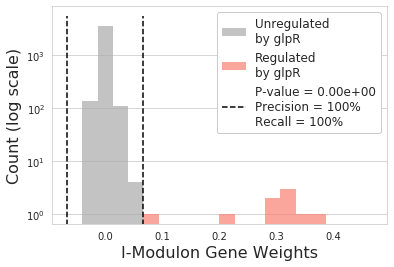

In [6]:
# code that gets the necessary data in a csv for generating the histogram
bins = 20
k = 1 # Not sure why this number is different
tf = 'glpR'

DF_gene = ica_data.component_DF(k,tfs=[tf])
tf_info = get_regulon_mapping(ica_data,k,tf)
if len(tf_info) == 0:
    tf_info = pd.Series({'pvalue':1,'precision':0,'recall':0})
else:
    tf_info = tf_info.iloc[0]

xmin = min(min(DF_gene.comp),-ica_data.thresholds[k])
xmax = max(max(DF_gene.comp),ica_data.thresholds[k])
width = 2*ica_data.thresholds[k]/(np.floor(2*ica_data.thresholds[k]*bins/(xmax-xmin)-1))
xmin = -ica_data.thresholds[k]-width*np.ceil((-ica_data.thresholds[k] - xmin)/width)
xmax = xmin + width*bins

fig, ax = plt.subplots()

ax.set_yscale('log', nonposy='clip')
ax.xaxis.grid(False)
ax.set_xlabel('I-Modulon Gene Weights',fontsize=16)
ax.set_ylabel('Count (log scale)',fontsize=16)

# Plot histogram for genes unregulated by TF
h1 = ax.hist(DF_gene[~DF_gene[tf]].comp,color='#aaaaaa',alpha=0.7,bins=bins,
        range=(xmin,xmax),linewidth=0,
        label='Unregulated\nby ' + tf)

# Plot histogram for genes regulated by TF
h2 = ax.hist(DF_gene[DF_gene[tf]].comp,color='salmon',alpha=0.7,bins=bins,
        range=(xmin,xmax),linewidth=0,
        label='Regulated\nby ' + tf)

ymin,ymax=ax.get_ylim()
if six.PY2:
    labelstr = 'P-value = {:.2e}\nPrecision = {:.0f}%%\nRecall = {:.0f}%%'.format(tf_info.pvalue,\
                                           tf_info.precision*100,\
                                           tf_info.recall*100)
else:
    labelstr = 'P-value = {:.2e}\nPrecision = {:.0f}%\nRecall = {:.0f}%'.format(tf_info.pvalue,\
                                           tf_info.precision*100,\
                                           tf_info.recall*100)
ax.vlines([ica_data.thresholds[k],-ica_data.thresholds[k]],0,ymax,linestyles='dashed',
               label=labelstr)

legend = ax.legend(fontsize=12,frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_linewidth(1)
legend.get_frame().set_alpha(1)

# we will deal with gene names after I have this in the page

In [9]:
hist_out = pd.DataFrame(columns = h1[1][:-1])
hist_out.loc['unreg'] = h1[0]
hist_out.loc[tf] = h2[0]

# thresholds
hist_out.loc['thresh'] = [-ica_data.thresholds[k], ica_data.threshdolds[k]] + [np.nan]*(hist_out.shape[1]-2)

unreg_genes = pd.Series(index = hist_out.columns)
reg_genes = pd.Series(index = hist_out.columns)

# list gene names for hover functionality
for b_lower in hist_out.columns:
    b_upper = b_lower + width
    if (b_lower >= ica_data.thresholds[k]) or (b_upper <= -ica_data.thresholds[k]):
        g_un = DF_gene.gene_name[~DF_gene[tf] & (DF_gene.comp > b_lower) & (DF_gene.comp < b_upper)]
        unreg_genes.loc[b_lower] = np.array2string(g_un.values, separator = ' ')
    else:
        unreg_genes.loc[b_lower] = '[]'
    g_reg = DF_gene.gene_name[DF_gene[tf] & (DF_gene.comp > b_lower) & (DF_gene.comp < b_upper)]
    reg_genes.loc[b_lower] = np.array2string(g_reg.values, separator = ' ')
hist_out.loc['unreg_genes'] = unreg_genes
hist_out.loc[tf+'_genes'] = reg_genes

# save output
hist_out.to_csv('glpR_hist.csv')

In [7]:
hist_out

,-0.069076,-0.041446,-0.013815,0.013815,0.041446,0.069076,0.096707,0.124338,0.151968,0.179599,0.207229,0.234860,0.262490,0.290121,0.317752,0.345382,0.373013,0.400643,0.428274,0.455904
unreg,0,132,3693,107,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
glpR,0,0,0,0,0,1,0,0,0,0,1,0,1,3,1,1,1,0,0,0
thresh,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unreg_genes,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
glpR_genes,[],[],[],[],[],['glpX'],[],[],[],[],['glpQ'],[],['glpK'],['glpT' 'glpF' 'glpC'],['glpB'],['glpD'],['glpA'],[],[],[]


In [13]:
DF_gene.sort_values('comp', ascending = False)

,comp,product,gene_name,operon,length,TF,glpR
b2241,0.374304,anaerobic glycerol-3-phosphate dehydrogenase s...,glpA,"glpA,glpB,glpC",1629,"Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR",True
b3426,0.346618,"glycerol-3-phosphate dehydrogenase, aerobic",glpD,glpD,1506,"Sigma70,arcA,crp,glpR,yieP",True
b2242,0.326162,anaerobic glycerol-3-phosphate dehydrogenase s...,glpB,"glpA,glpB,glpC",1260,"Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR",True
b2243,0.314434,anaerobic glycerol-3-phosphate dehydrogenase s...,glpC,"glpA,glpB,glpC",1191,"Sigma70,arcA,crp,fis,flhD;flhC,fnr,glpR",True
b3927,0.310730,glycerol channel GlpF,glpF,"glpF,glpK,glpX",846,"Sigma70,crp,glpR",True
b2240,0.304634,glycerol-3-phosphate:phosphate antiporter,glpT,"glpT,glpQ",1359,"Sigma70,crp,fis,fnr,glpR,ihf,nac",True
b3926,0.289343,glycerol kinase,glpK,"glpF,glpK,glpX",1509,"Sigma70,crp,glpR",True
b2239,0.210477,"glycerophosphoryl diester phosphodiesterase, p...",glpQ,"glpT,glpQ",1077,"Sigma70,crp,fis,fnr,glpR,ihf,nac",True
b3925,0.084247,"fructose 1,6-bisphosphatase II",glpX,"glpF,glpK,glpX",1011,"Sigma70,crp,glpR",True
b4598,0.053906,small membrane protein,yncL,yncL,96,fnr,False


### Other plots

Use a heading followed by a code block to generate any additional files needed.

We can also use this notebook to write html, if desired.